In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import math
%matplotlib inline

In [135]:
alpha = 0.95
theta = 1
num_tests = 1000
N = 100

In [136]:
def test_probability(llvl,rlvl,num,distr_gen):
    qnt = 0.0
    for i in range(num):
        X = distr_gen()
        if llvl(X,alpha) < theta < rlvl(X,alpha) :
            qnt+=1
            
    return round(qnt / num,3)
    

Доверительные интеравалы уровня $\alpha$ равномерного распределения :

$\left(\frac{2\bar{X}}{1 + \frac{1}{\sqrt{3n(1-\alpha)}}}, \frac{2\bar{X}}{1 - \frac{1}{\sqrt{3n(1-\alpha)}}}\right)$

$\left( X_{(1)}, \frac{X_{(1)}}{1 - \sqrt[n]{\alpha}}\right)$   

$\left( X_{(n)}, \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}}\right)$  

In [37]:
def trust_level_uniform_average_l(X, alpha) :
    l = 2 * np.mean(X)/(1 + 1/(3 * len(X) * (1-alpha))**0.5)
    return l
def trust_level_uniform_average_r(X, alpha) :
    r = 2 * np.mean(X)/(1 - 1/(3 * len(X) * (1-alpha))**0.5)
    return r

def trust_level_uniform_min_l(X, alpha) :
    l = np.min(X)
    return l
def trust_level_uniform_min_r(X, alpha) :
    r = np.min(X)/(1 - alpha**(1/len(X)))
    return r
    
def trust_level_uniform_max_l(X, alpha) :
    l = np.max(X)
    return l
def trust_level_uniform_max_r(X, alpha) :
    r = np.max(X)/((1 - alpha)**(1/len(X)))
    return r

In [73]:
def build_plot(OX,low,high,distr,method,xlim=[],ylim=[]):
    title = distr + ' , use : ' + method
    plt.figure(figsize=(12,11))
    plt.fill_between(n,low,high,alpha=0.5)
    plt.grid(True)
    plt.title(title,fontsize=15)
    if len(ylim) == 2 :
        plt.ylim(ylim)
    if len(xlim) == 2 :
        plt.xlim(xlim)
    plt.show()

In [97]:
X = sps.uniform.rvs(size=N)
n = np.arange(1,N+1,1)

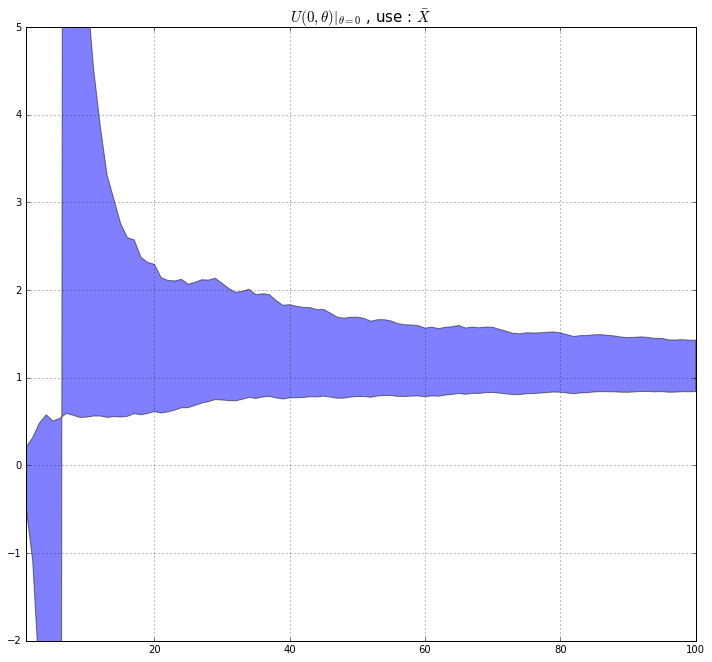

n = 10, P = 1.0
n = 100, P = 1.0


In [140]:
trust_avg_l = [trust_level_uniform_average_l(X[0:k],alpha) for k in n]
trust_avg_r = [trust_level_uniform_average_r(X[0:k],alpha) for k in n]

build_plot(n,trust_avg_l,trust_avg_r,
           r'$U(0,\theta)|_{\theta = 0}$',r'$\bar{X}$',
           [1,100],[-2,5])
for k in {10,100} :
    print('n = ' + str(k) + ', P = ' 
          + str(test_probability(trust_level_uniform_average_l,
                trust_level_uniform_average_r,
                num_tests,
                lambda : sps.uniform.rvs(size=k))))


Этот интервал не является точным, т.к. получен с сипользованием неравенства Чебышева.

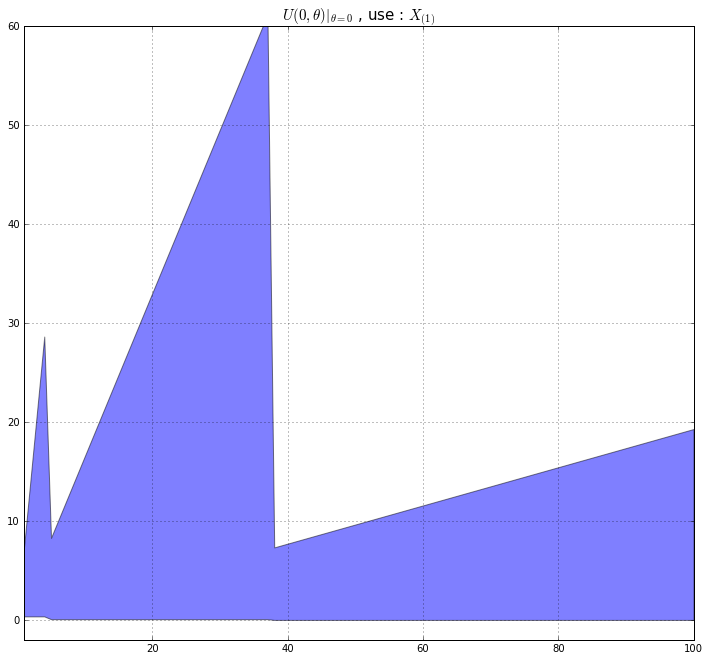

n = 10, P = 0.945
n = 100, P = 0.952


In [141]:
trust_min_l = [trust_level_uniform_min_l(X[0:k],alpha) for k in n]
trust_min_r = [trust_level_uniform_min_r(X[0:k],alpha) for k in n]
build_plot(n,trust_min_l,trust_min_r,
           r'$U(0,\theta)|_{\theta = 0}$',r'$X_{(1)}$',[1,100],[-2,60])

for k in {10,100} :
    print('n = ' + str(k) + ', P = ' 
          + str(test_probability(trust_level_uniform_min_l,
                trust_level_uniform_min_r,
                num_tests,
                lambda : sps.uniform.rvs(size=k))))



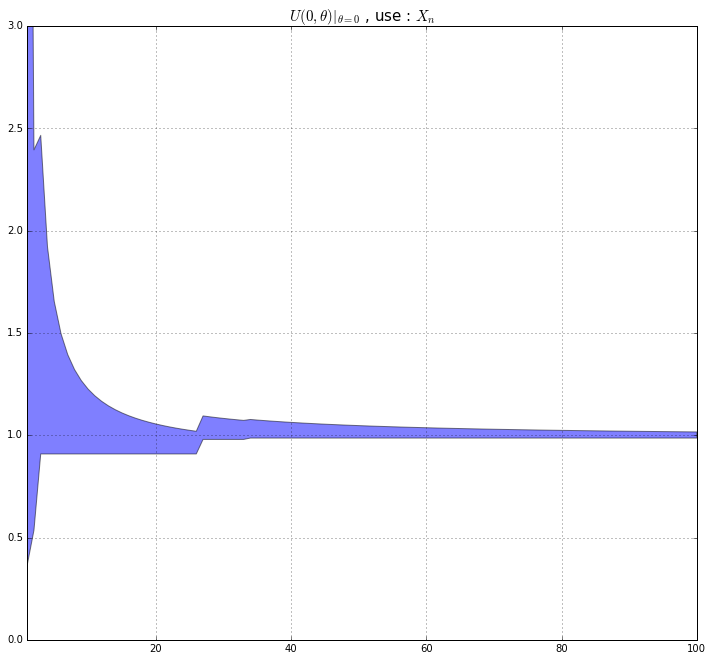

n = 10, P = 0.942
n = 100, P = 0.949


In [142]:
trust_max_l = [trust_level_uniform_max_l(X[0:k],alpha) for k in n]
trust_max_r = [trust_level_uniform_max_r(X[0:k],alpha) for k in n]

build_plot(n,trust_max_l,trust_max_r,
           r'$U(0,\theta)|_{\theta = 0}$',r'$X_{n}$',[1,100],[0,3])

for k in {10,100} :
    print('n = ' + str(k) + ', P = ' 
          + str(test_probability(trust_level_uniform_max_l,
                trust_level_uniform_max_r,
                num_tests,
                lambda : sps.uniform.rvs(size=k))))

Интервал (1) дает хорошее приближение (лучше чем (2)), но является избыточным, т.к. использует нижнюю оценку вероятности, а не точное значение.

Интервал (2) не сходятся к $\theta$

Интервал (3) сходятся к $\theta$ и дает хорошую точность

Асимптотический доверительный интервал уровня $\alpha$ для $cauchy(\theta, 1)$ : 

$(\mu - Z_{\frac{\alpha + 1}{2}} \frac{\pi}{2\sqrt{n}}, \mu + Z_{\frac{\alpha + 1}{2}}\frac{\pi}{2\sqrt{n}})$, где $Z_{x}$ - квантиль уровня $x$ для нормального распределения, $\mu$ - выборочная медиана.

In [155]:
def trust_level_cauchy_l(X,alpha):
     return np.median(X) 
        - sps.norm.ppf((1 + alpha)/2) * np.pi /(2 * (len(X) ** 0.5))
    
def trust_level_cauchy_r(X,alpha):
     return np.median(X) 
        + sps.norm.ppf((1 + alpha)/2) * np.pi /(2 * (len(X) ** 0.5))

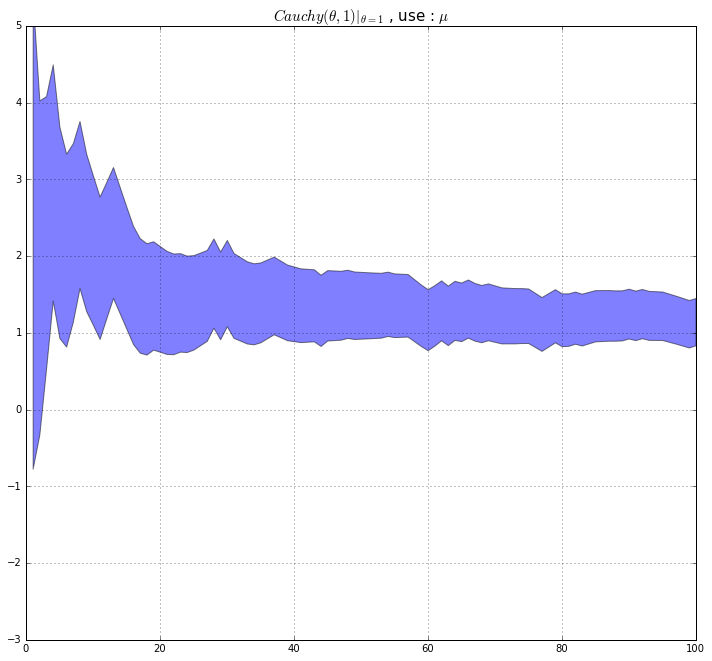

n = 10, P = 0.93
n = 100, P = 0.944


In [181]:
theta = 1
X = sps.cauchy.rvs(theta,scale=1,size=N)
trust_max_l = [trust_level_cauchy_l(X[0:k],alpha) for k in n]
trust_max_r = [trust_level_cauchy_r(X[0:k],alpha) for k in n]

build_plot(n,trust_max_l,trust_max_r,
           r'$Cauchy(\theta,1)|_{\theta = 1}$',r'$\mu$',[],[-3,5])

for k in {10,100} :
    print('n = ' + str(k) + ', P = ' 
          + str(test_probability(trust_level_cauchy_l,
                    trust_level_cauchy_r,
                    num_tests,
                    lambda : sps.cauchy.rvs(theta,scale=1,size=k))))

Асимптотический доверительный интервал для $Pois(\theta)$ уровня $\alpha$:

$\left(\bar{X} - Z_{\frac{1 + \alpha}{2}} \sqrt{\frac{\bar {X}}{n}}, \bar{X} + Z_{\frac{1 + \alpha}{2}} \sqrt{\frac{\bar{X}}{n}}\right)$

где $Z_{x}$ - квантиль уровня $x$ для стандартного нормального распределения $\mathcal{N}(0,1)$.

In [194]:
def trust_level_pois_l(X,alpha):
    return np.mean(X) 
        - sps.norm.ppf((1 + alpha)/2)*((np.mean(X)/len(X)) ** 0.5)

def trust_level_pois_r(X,alpha):
    return np.mean(X) 
        + sps.norm.ppf((1 + alpha)/2)*((np.mean(X)/len(X)) ** 0.5)

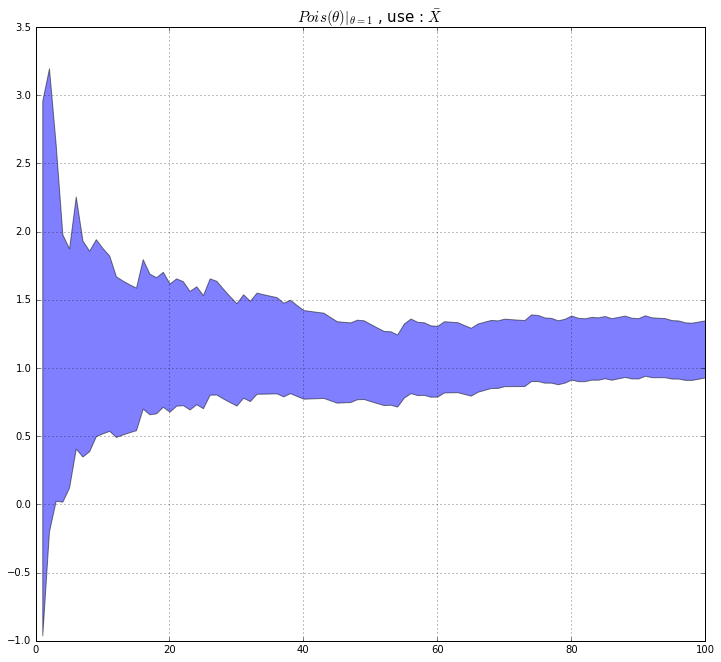

n = 10, P = 0.938
n = 100, P = 0.941


In [189]:
theta = 1
X = sps.poisson.rvs(mu=theta,size=N)
trust_max_l = [trust_level_pois_l(X[0:k],alpha) for k in n]
trust_max_r = [trust_level_pois_r(X[0:k],alpha) for k in n]

build_plot(n,trust_max_l,trust_max_r,
           r'$Pois(\theta)|_{\theta = 1}$',r'$\bar{X}$',[],[])

for k in {10,100} :
    print('n = ' + str(k) + ', P = ' 
          + str(test_probability(trust_level_pois_l,
                        trust_level_pois_r,
                        num_tests,
                        lambda : sps.poisson.rvs(mu=theta,size=k))))

Асимптотический доверительный интервал для $\Gamma(\theta,\lambda)$ уровня $\alpha$ с неизвестным $\theta$:

$\left(\frac{\lambda - Z_{\frac{1 + \alpha}{2}} \sqrt{\frac{\lambda}{n}}}{\bar {X}}, \frac{\lambda + Z_{\frac{1 + \alpha}{2}} \sqrt{\frac{\lambda}{n}}}{\bar {X}}\right)$

где $Z_{x}$ - квантиль уровня $x$ для стандартного нормального распределения $\mathcal{N}(0,1)$.

In [190]:
lmb = 1
def trust_level_gamma_l(X,alpha):
    return (lmb - sps.norm.ppf((1 + alpha)/2) * (lmb/len(X))**0.5)/np.mean(X)

def trust_level_gamma_r(X,gamma):
    return (lmb + sps.norm.ppf((1 + alpha)/2) * (lmb/len(X))**0.5)/np.mean(X)

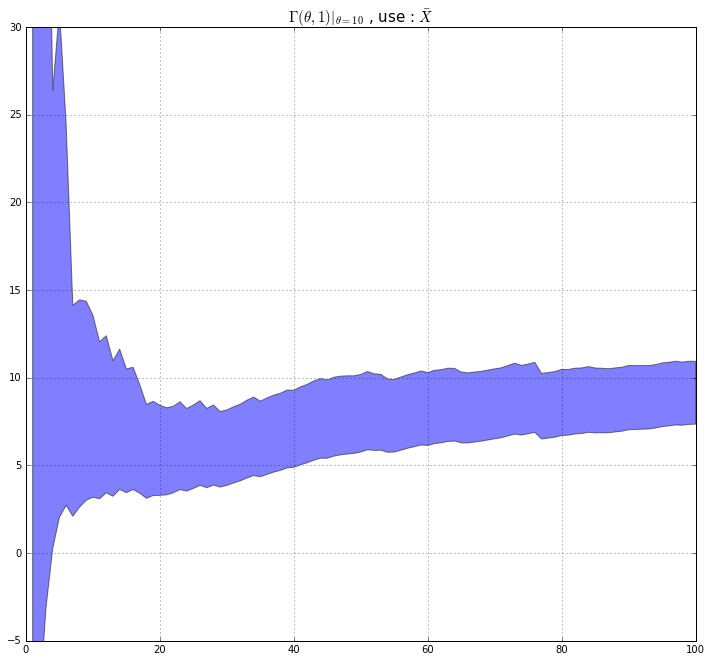

n = 10, P = 0.957
n = 100, P = 0.951


In [196]:
theta = 10
X = sps.gamma.rvs(a=lmb,scale=1/theta,size=N)
trust_max_l = [trust_level_gamma_l(X[0:k],alpha) for k in n]
trust_max_r = [trust_level_gamma_r(X[0:k],alpha) for k in n]

build_plot(n,trust_max_l,trust_max_r,
           r'$\Gamma(\theta,1)|_{\theta = 10}$',r'$\bar{X}$',[],[-5,30])

for k in {10,100} :
    print('n = ' + str(k) + ', P = ' 
          + str(test_probability(trust_level_pois_l,
                trust_level_pois_r,
                num_tests,
                lambda : sps.poisson.rvs(mu=theta,size=k))))